<a href="https://www.kaggle.com/code/darshanawijesinghe/sciene-job?scriptVersionId=250261532" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: green ; background-color: #ffffff;"><b>1. Read and import data</b></h2>

In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/jobs-dataset-from-glassdoor/salary_data_cleaned.csv
/kaggle/input/jobs-dataset-from-glassdoor/glassdoor_jobs.csv
/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df_job = pd.read_csv('/kaggle/input/jobs-dataset-from-glassdoor/eda_data.csv')

<h2 style="font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Take a general look</b></h2>

In [3]:
df_job.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [4]:
df_job.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [5]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: green; background-color: #ffffff;"><b>2. Cleaning the data</b></h2>

In [6]:
#Drop the coloumns I think they aren't important for my analýis.
df_job.drop(columns = ['Unnamed: 0','Salary Estimate','Company Name','Headquarters','Job Description','Competitors','min_salary','max_salary','desc_len'], inplace = True)

My purpose when analyzing this data is having a view in factors impact to the average salary then
show a predicting base on RandomForest model.
That's why I will drop those columns above.

In [7]:
#Type of column in data
object_type = df_job.select_dtypes(['object']).columns
num_type = df_job.select_dtypes(['number']).columns
print(object_type)
print(num_type)

Index(['Job Title', 'Location', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'company_txt', 'job_state', 'job_simp',
       'seniority'],
      dtype='object')
Index(['Rating', 'Founded', 'hourly', 'employer_provided', 'avg_salary',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'num_comp'],
      dtype='object')


In [8]:
#Consider the missing values in data
df_job.isnull().sum()

Job Title            0
Rating               0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
hourly               0
employer_provided    0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
num_comp             0
dtype: int64

In [9]:
#general discribe the numeric data columns
df_general_num = df_job[num_type].describe()
df_general_num

,Rating,Founded,hourly,employer_provided,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,1.053908
std,0.801210,497.183763,0.177034,0.149721,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: green; background-color: #ffffff;"><b>3. Discovering the data</b></h2>

<AxesSubplot: title={'center': 'Type of jobs'}, xlabel='job_simp', ylabel='Count'>

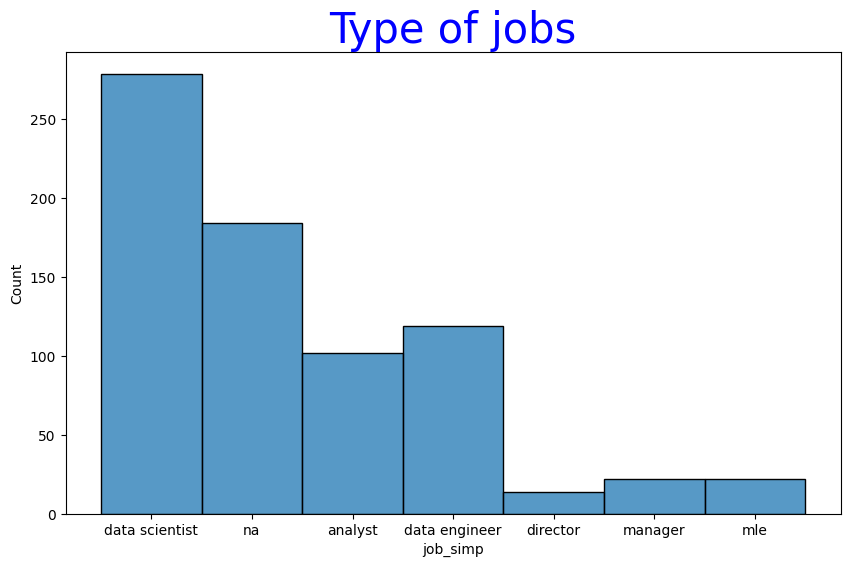

In [10]:
#Type of jobs in data
plt.figure(figsize = (10,6))
plt.title('Type of jobs', size = 30, color = 'blue')
sns.histplot(df_job['job_simp'])

* There are six main type of jobs in this data which the highest amount is data scientist.
* Next, let's move to the average salary will be paid by each type of job above.

<AxesSubplot: xlabel='value', ylabel='job_simp'>

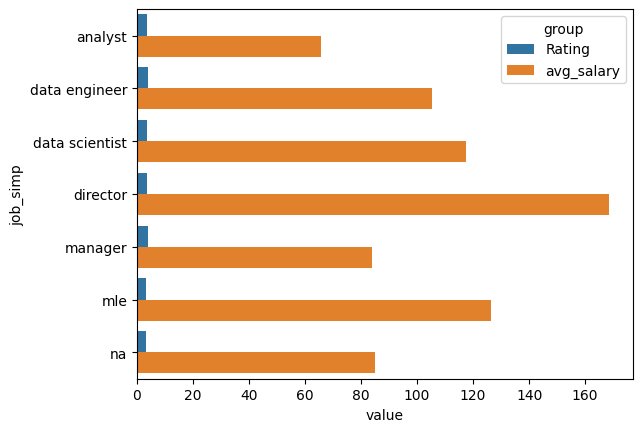

In [11]:
#Average salary and rating by type of job
avg_salary = pd.pivot_table(df_job, index = 'job_simp', values = ['Rating','avg_salary'], aggfunc = {'Rating':np.mean,'avg_salary':np.mean}).reset_index()
avg_chart = pd.melt(avg_salary, id_vars = 'job_simp', value_vars = ['Rating','avg_salary'], var_name = 'group')
sns.barplot(data = avg_chart, x = 'value', y = 'job_simp', hue = 'group')

* So both of all jobs have the same rate but director is the job having the highest salary although this job has the lowest amount.
* Data scientist has the rank third in salary and has the highest amount of job so this is the hottest in this data
**How about the region for those jobs? Let's move to the next topic.**

<AxesSubplot: title={'center': 'Top 10 region have the highest average salary'}, xlabel='Location', ylabel='avg_salary'>

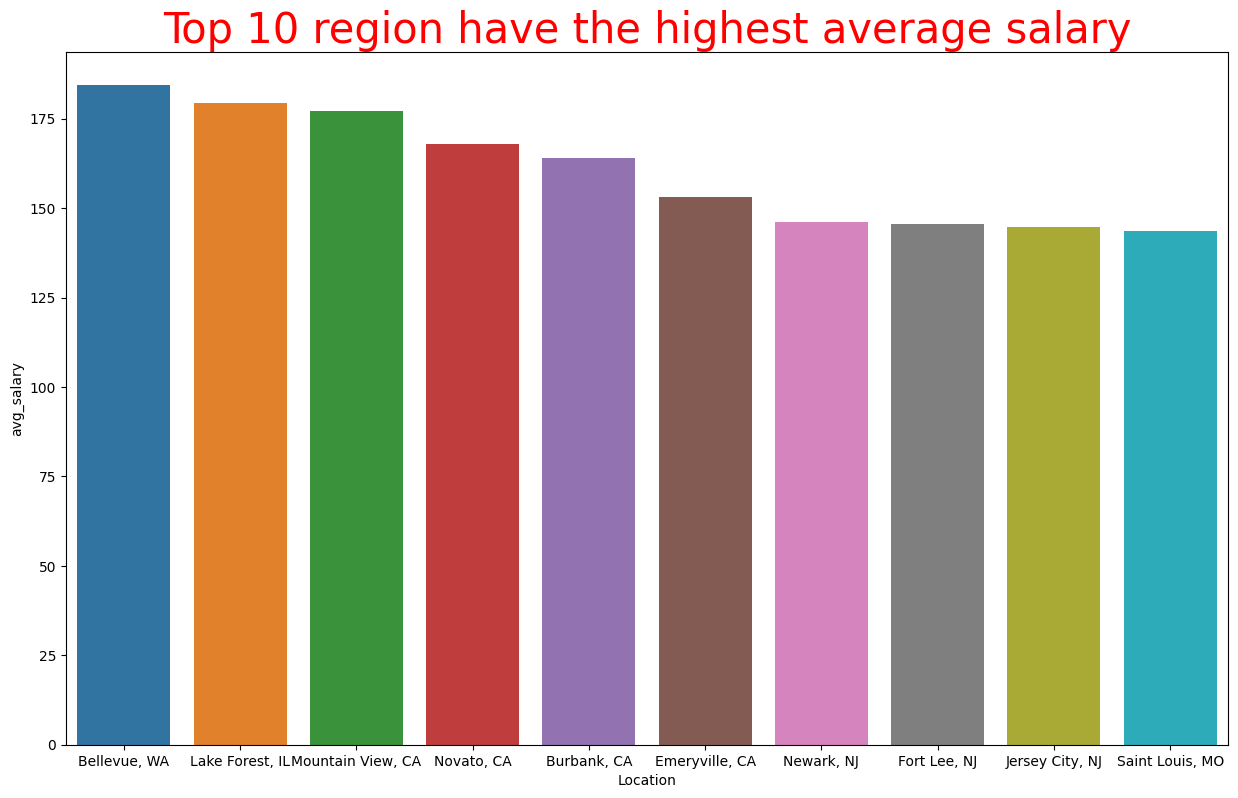

In [12]:
#Top 10 city pay the highest salary
plt.figure(figsize = (15,9))
city = pd.pivot_table(df_job, index = 'Location', values = 'avg_salary', aggfunc = np.mean).reset_index()
city = city.sort_values('avg_salary', ascending = False)
city_10 = city.head(10)
plt.title('Top 10 region have the highest average salary', size = 30, color = 'red')
sns.barplot(city_10, x = 'Location', y = 'avg_salary')

* The salary will be paid base on city and state is quite balance in top 10.
* Believue in WA state is the region has the highest salary.

<h2 style="font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Another clearly look</b></h2>

In [13]:
#This time we will have a table distributing the type of jobs in each region.
city_job = pd.pivot_table(df_job, index = ['job_simp', 'Location'], values = 'Job Title', aggfunc = len).reset_index()
city_job.rename(columns = {'Job Title':'Number'}, inplace = True)


In [14]:
# Then find the top 10 city have the job recruitments by type of job
city_job_1 = city_job[city_job['job_simp']!='na']
city_job_top10 = pd.DataFrame()
for i in set(city_job_1['job_simp']):
    temp = city_job[city_job['job_simp']==i]
    num = temp.sort_values('Number', ascending = False).head(10)
    city_job_top10 = pd.concat([city_job_top10,num], ignore_index = True)
city_job_top10

,job_simp,Location,Number
0,data engineer,"San Francisco, CA",11
1,data engineer,"Chicago, IL",7
2,data engineer,"Cambridge, MA",6
3,data engineer,"Austin, TX",5
4,data engineer,"Washington, DC",4
5,data engineer,"Indianapolis, IN",4
6,data engineer,"Charlotte, NC",4
7,data engineer,"Knoxville, TN",4
8,data engineer,"Mountain View, CA",4
9,data engineer,"Herndon, VA",3


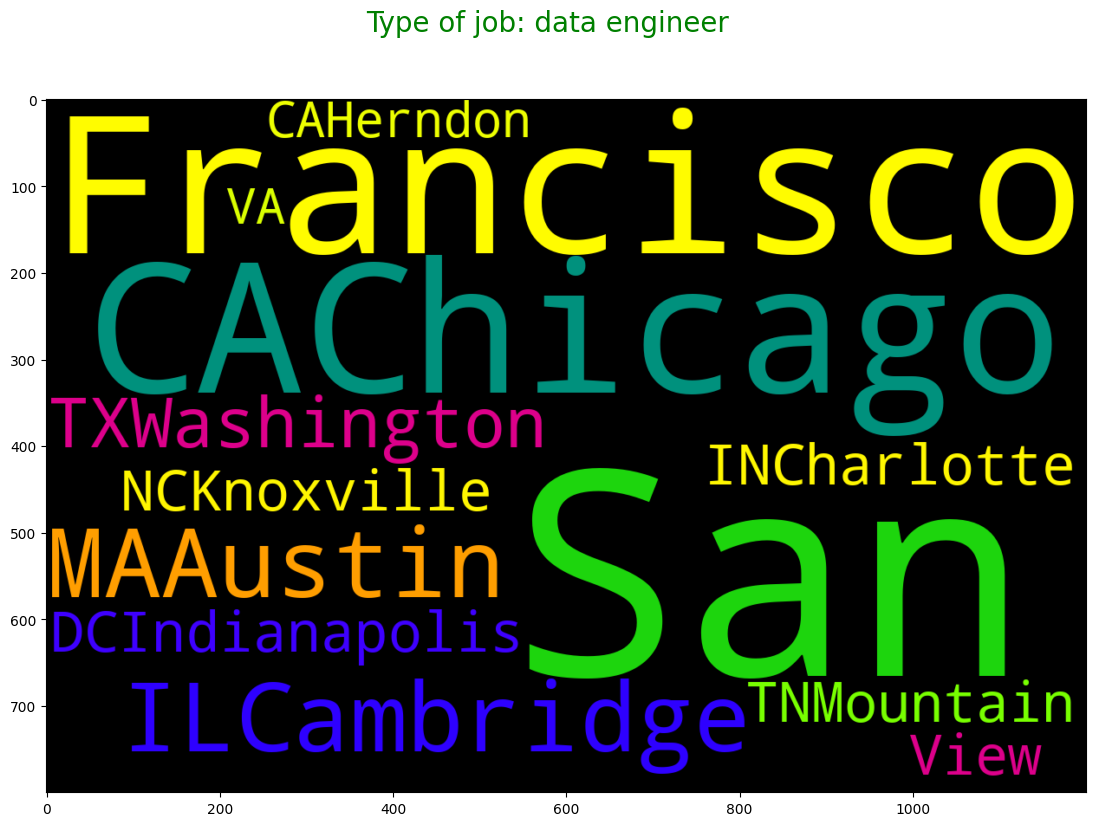

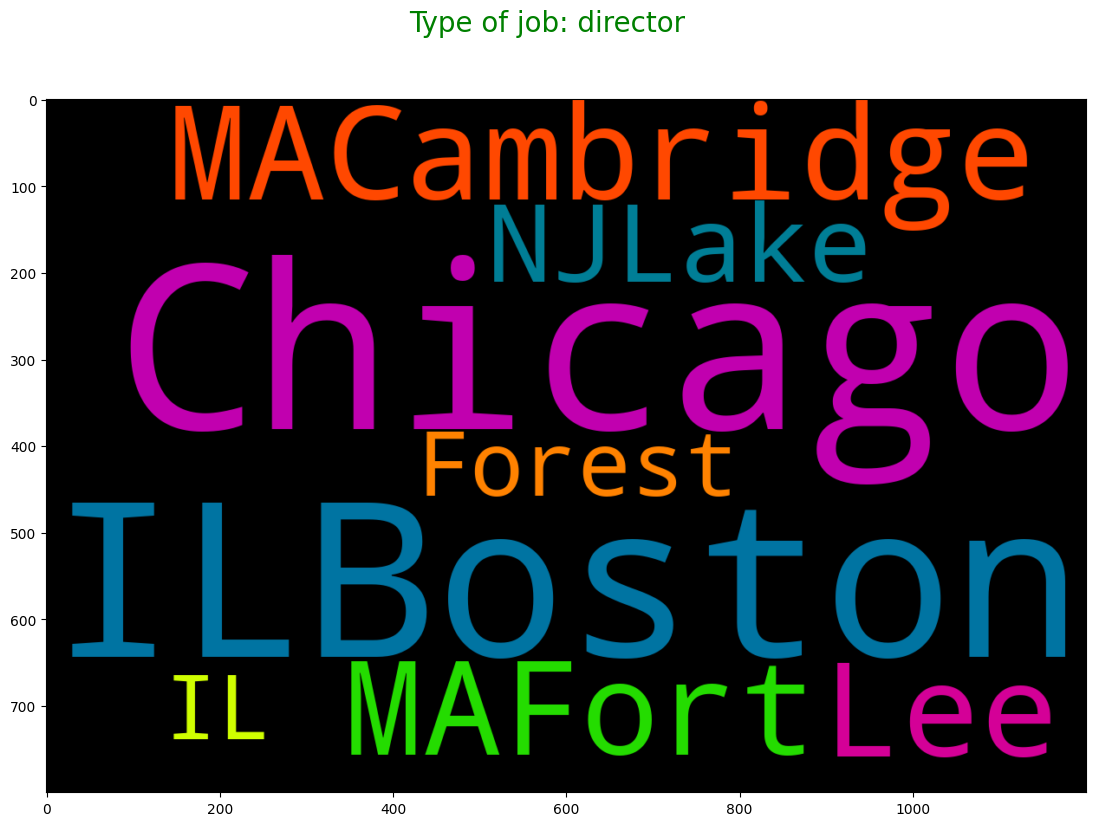

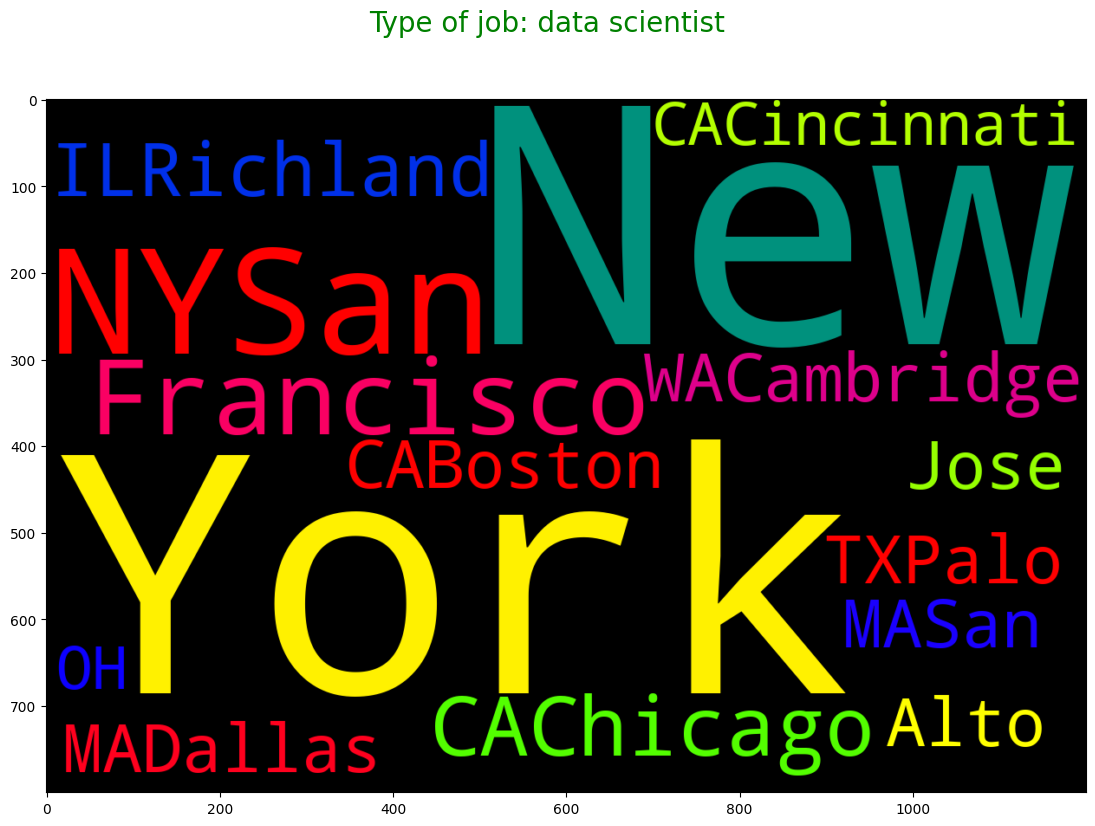

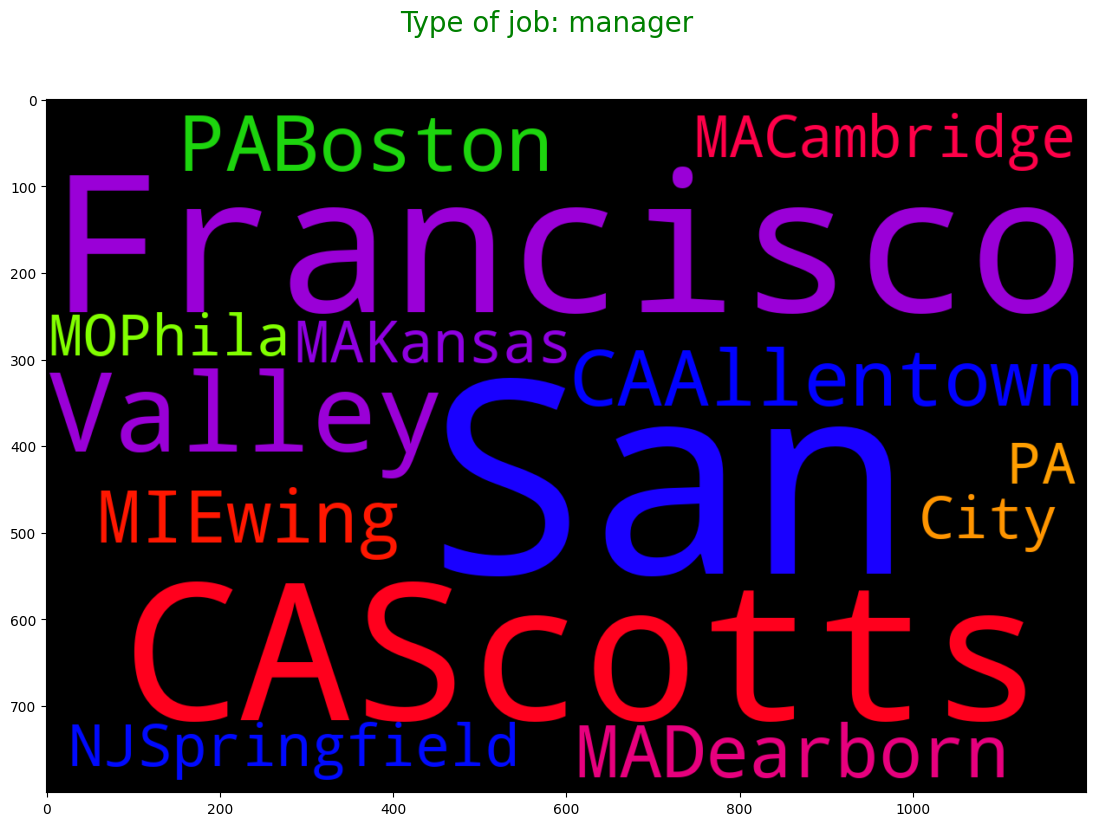

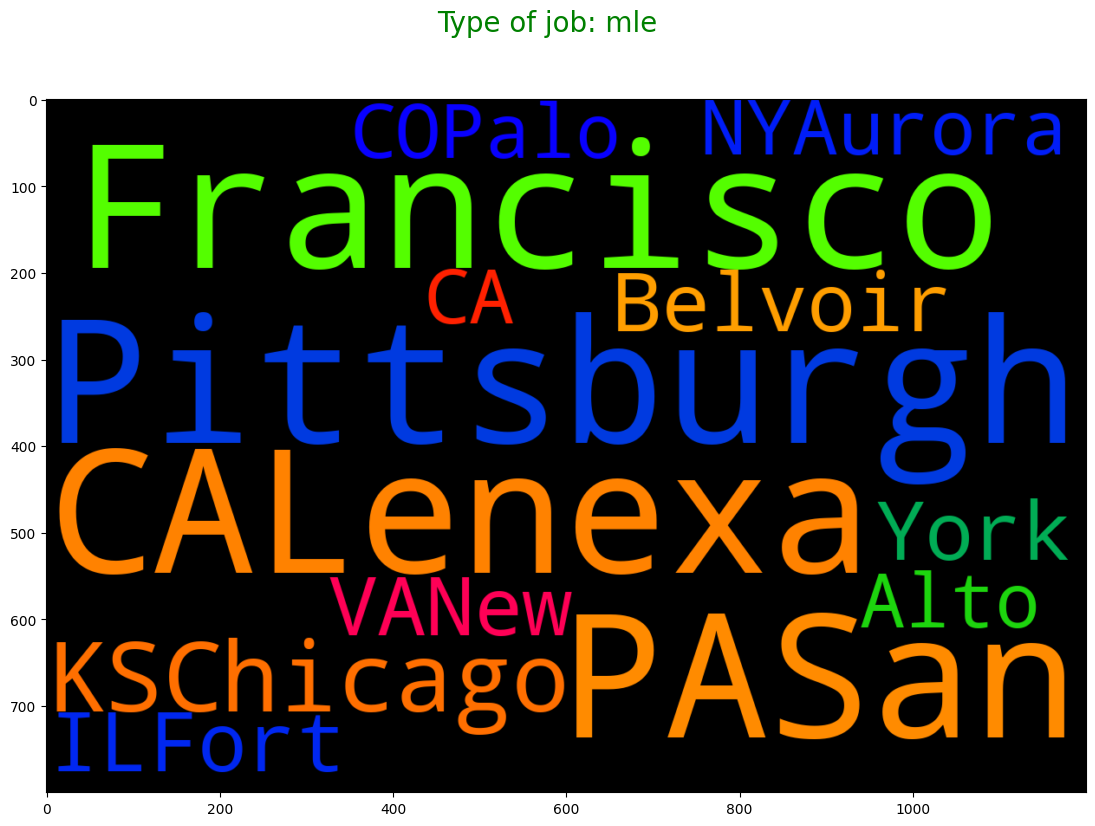

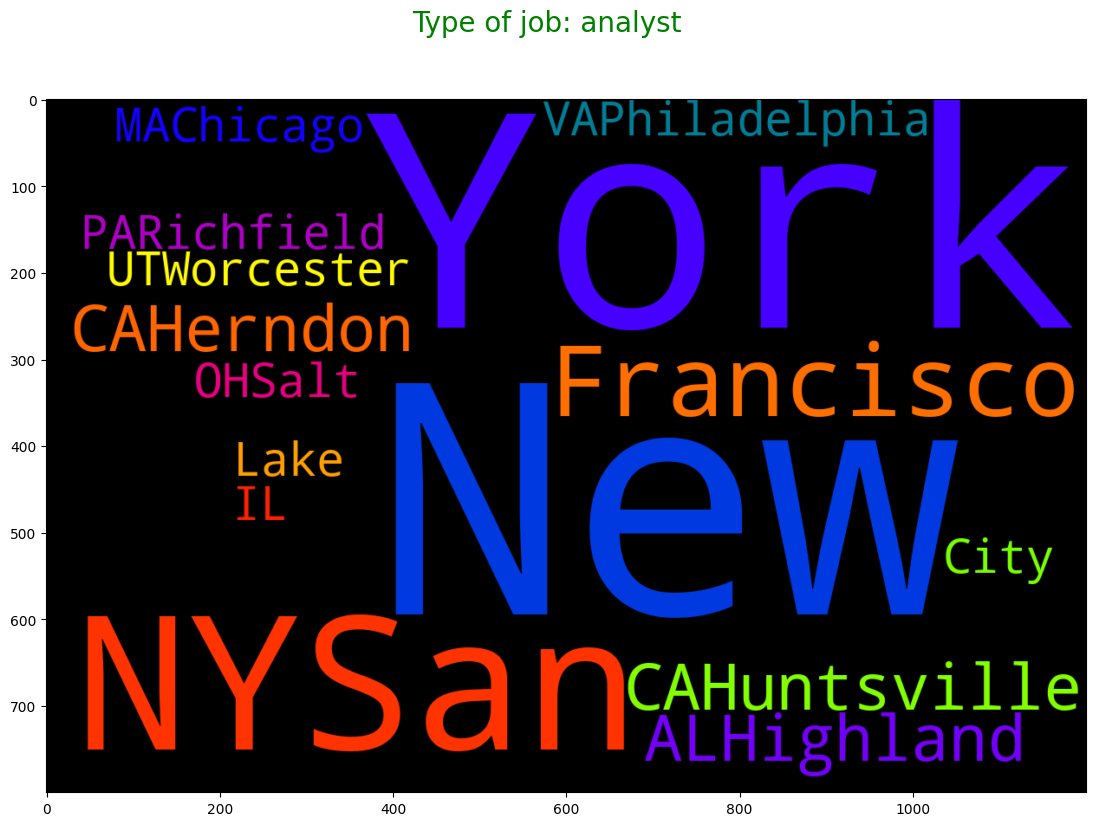

In [15]:
#Finally, I put them into WordCloud for more clearly look
from wordcloud import WordCloud, STOPWORDS
for i in city_job_top10['job_simp'].unique():
    text = ''.join(city_job_top10[city_job_top10['job_simp']==i]['Location'])
    word_cloud = WordCloud(width = 1200, height = 800, colormap = 'prism', background_color = 'black').generate(text)
    plt.figure(figsize = (15,9))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.suptitle(f'Type of job: {i}', size = 20, color = 'green')
    plt.show()

<h2 style="font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Recruitment Companies</b></h2>

First, I will rank the companies again base on their size of employees and year founded.

In [16]:
#Ranking kind of Company
type_com = []
for i in df_job['Founded']:
    if i==-1:
        type_com.append('No info')
    elif i<=1980:
        type_com.append('Old Company')
    elif 1980<i<2000:
        type_com.append('Mid Age Company')
    elif 2000<=i<2020:
        type_com.append('Young Company')
    else:
        type_com.append('New Company')
df_job['Kind of Company'] = type_com

<AxesSubplot: title={'center': 'Kind of companies'}, xlabel='Kind of Company', ylabel='Count'>

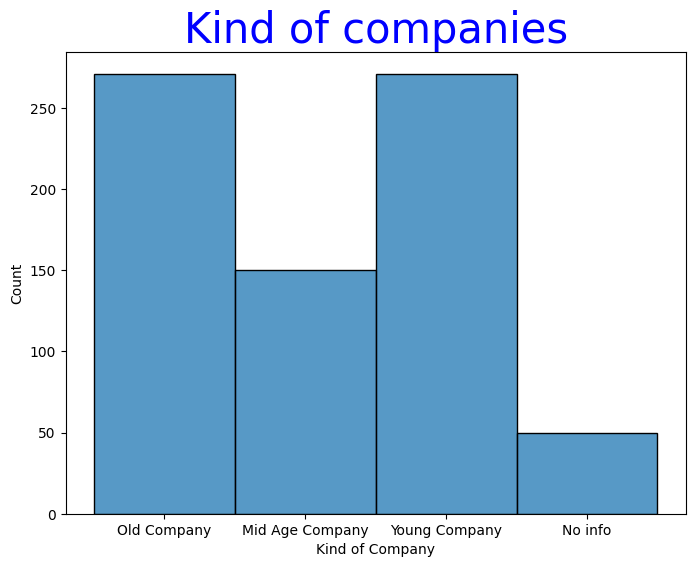

In [17]:
plt.figure(figsize =(8,6))
plt.title('Kind of companies', size = 30, color = 'blue')
sns.histplot(df_job['Kind of Company'])

So the traditional companies and the companies were founded in 21 century take the majority.  

In [18]:
#Ranking scale of company
size_com = []
for i in df_job['Size']:
    if i ==-1 or i =='Unknow':
        size_com.append('No Info')
    elif i=='1 to 50 employees'or i=='51 to 200 employees':
        size_com.append('Small')
    elif i =='201 to 500 employees' or i =='501 to 1000 employees':
        size_com.append('Medium')
    elif i=='1001 to 5000 employees' or i =='5001 to 10000 employees':
        size_com.append('Big')
    else:
        size_com.append('Enormous')
df_job['Size_com'] = size_com

<AxesSubplot: title={'center': 'Size of companies'}, xlabel='Size_com', ylabel='Count'>

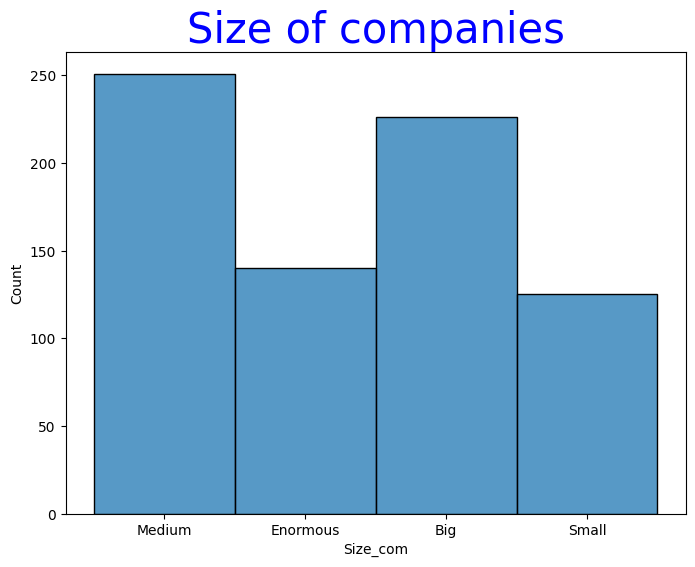

In [19]:
plt.figure(figsize =(8,6))
plt.title('Size of companies', size = 30, color ='blue')
sns.histplot(df_job['Size_com'])

The Medium and Big companies take the majority in this data.

In [20]:
#General view about type of job, company and average salary
company_job = pd.pivot_table(df_job, index = ['job_simp', 'Size_com','Kind of Company'], values = ['Job Title', 'avg_salary'], aggfunc = {'Job Title':len,'avg_salary':np.mean}).reset_index()
company_job.rename(columns = {'Job Title': 'Number'}, inplace = True)
company_job

,job_simp,Size_com,Kind of Company,Number,avg_salary
0,analyst,Big,Mid Age Company,12,70.625000
1,analyst,Big,Old Company,12,69.125000
2,analyst,Big,Young Company,12,54.833333
3,analyst,Enormous,Mid Age Company,1,77.000000
4,analyst,Enormous,No info,3,57.333333
...,...,...,...,...,...
66,na,Medium,Old Company,18,66.694444
67,na,Medium,Young Company,14,92.214286
68,na,Small,Mid Age Company,4,97.250000
69,na,Small,Old Company,5,36.300000


<AxesSubplot: title={'center': 'Average slary by size of companies'}, xlabel='Size_com', ylabel='avg_salary'>

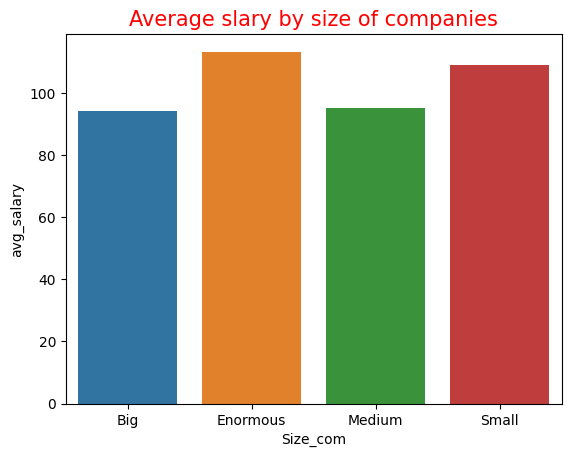

In [21]:
#What type of company ready for a high salary?
high_com_salary = pd.pivot_table(df_job,index = 'Size_com', values = 'avg_salary', aggfunc = np.mean).reset_index()
plt.title('Average slary by size of companies', size = 15, color = 'red')
sns.barplot(high_com_salary,x = 'Size_com', y='avg_salary')

* Although the amount of Enormous Company aren't as big as big and medium companies, but the average salary they ready pay for jobs is the highest.
* Small companies also ready for a high salary if they find the staff suitable for theri job requirements.

<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: green; background-color: #ffffff;"><b>4. Relationship of Requirements for jobs</b></h2>

<h2 style="font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Let's see the factors have affect to salary</b></h2>

<AxesSubplot: title={'center': 'Python requirement and the average salary'}, xlabel='python_yn', ylabel='avg_salary'>

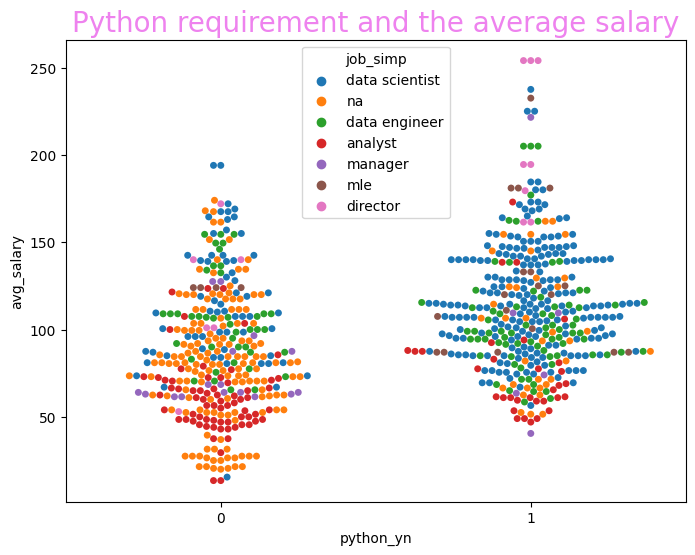

In [22]:
#First, the python requirement
plt.figure(figsize = (8,6))
plt.title('Python requirement and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='python_yn', y='avg_salary', hue ='job_simp')

So as we can see, the employee have Python skill will get higher salary, especially in anylyst, data scientist and data engineer

<AxesSubplot: title={'center': 'R requirement and the average salary'}, xlabel='R_yn', ylabel='avg_salary'>

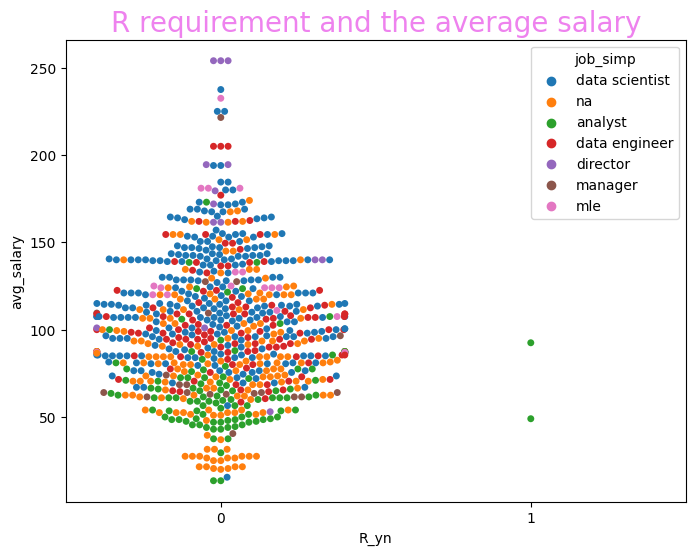

In [23]:
#The R requirement 
plt.figure(figsize = (8,6))
plt.title('R requirement and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='R_yn', y='avg_salary', hue ='job_simp')

So the R language isn't a major decide a higher salary.

<AxesSubplot: title={'center': 'Spark requirement and the average salary'}, xlabel='spark', ylabel='avg_salary'>

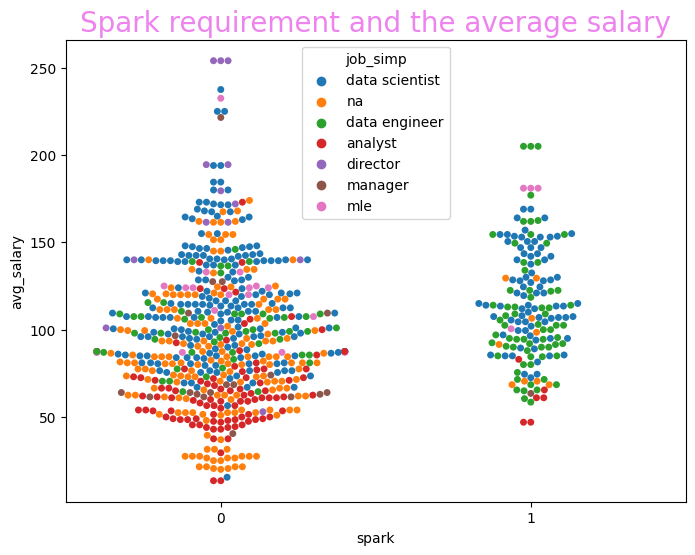

In [24]:
#The spark requirement
plt.figure(figsize = (8,6))
plt.title('Spark requirement and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='spark', y='avg_salary', hue ='job_simp')

Spark isn't important for a higher salary, except MLE and data engineer.

<AxesSubplot: title={'center': 'AWS requirement and the average salary'}, xlabel='aws', ylabel='avg_salary'>

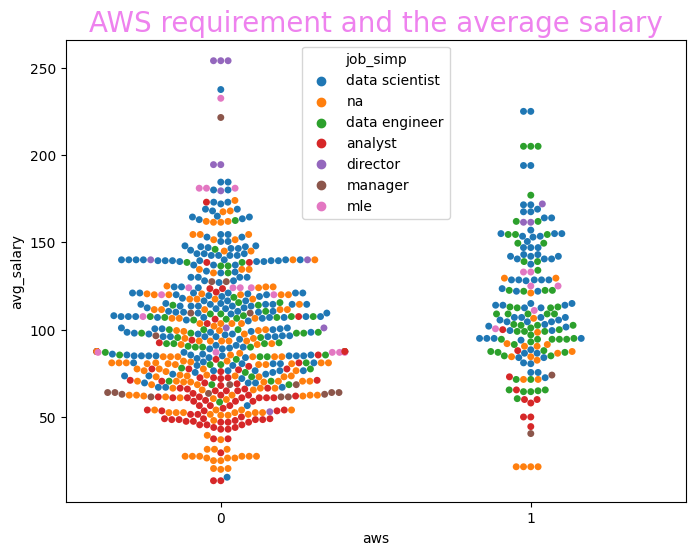

In [25]:
#The aws requirement
plt.figure(figsize = (8,6))
plt.title('AWS requirement and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='aws', y='avg_salary', hue ='job_simp')

Just like Spark, aws isn't important for a higher salary, but both data engineer and data scientist will need it for a higher deal.

<AxesSubplot: title={'center': 'Excel requirement and the average salary'}, xlabel='excel', ylabel='avg_salary'>

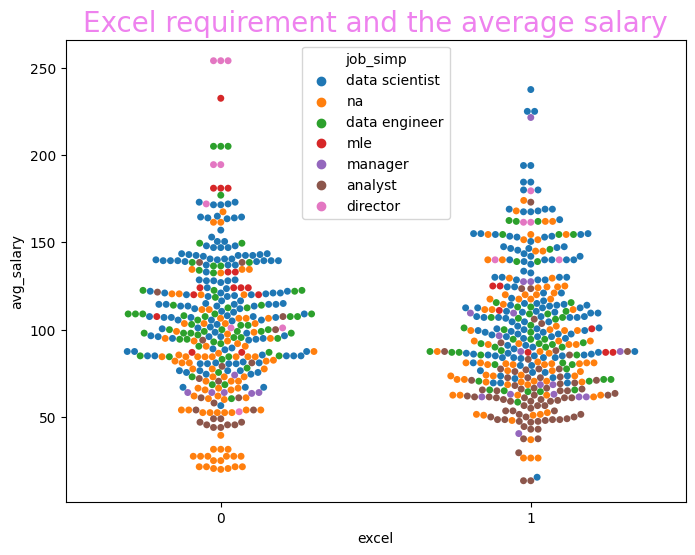

In [26]:
#Excel requirement
plt.figure(figsize = (8,6))
plt.title('Excel requirement and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='excel', y='avg_salary', hue ='job_simp')

Just like Spark and aws, excel isn't important for a higher salary.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: title={'center': 'Competive job and the average salary'}, xlabel='num_comp', ylabel='avg_salary'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed

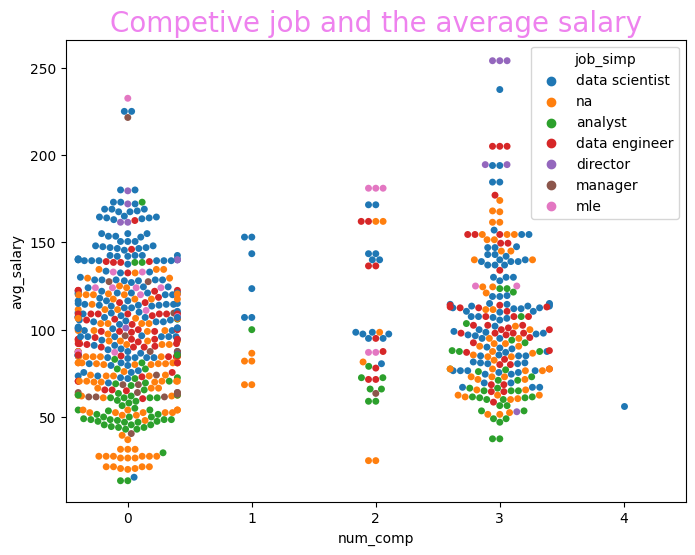

In [27]:
#Now about the competitive in job
plt.figure(figsize = (8,6))
plt.title('Competive job and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='num_comp', y='avg_salary', hue ='job_simp')

So competition is a major factor decide the salary. The more competitive people in job, the higher salary they will be received.

<AxesSubplot: title={'center': 'Seniority and the average salary'}, xlabel='seniority', ylabel='avg_salary'>

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


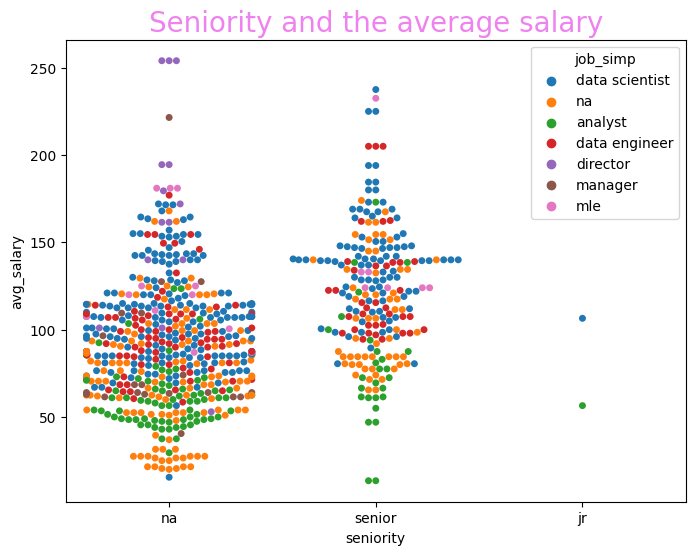

In [28]:
#Finally, seniority and salary
plt.figure(figsize = (8,6))
plt.title('Seniority and the average salary', size = 20, color = 'violet')
sns.swarmplot(df_job,x='seniority', y='avg_salary', hue ='job_simp')

So the senior rank will have a chance to get higher salary.

<h2 style="font-family: Verdana; font-size: 25px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: green; background-color: #ffffff;"><b>5. Predict the salary</b></h2>

**I will use python, R, spark, aws, excel requirement and the number of competitors for predicting the average salary by RandomForest Model**

In [29]:
#Create train spilit model
from sklearn.model_selection import train_test_split
feature = ['python_yn','R_yn','spark','aws','excel','num_comp']
X = df_job[feature]
y= df_job.avg_salary
train_X, var_X, train_y, var_y = train_test_split(X, y, random_state=0)

In [30]:
#Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

<h2 style="font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Finding the best number of trees using for model</b></h2>

In [31]:
def score(n_estimate):
    pipeline = Pipeline(steps = 
                       [('Process', SimpleImputer()),
                       ('model', RandomForestRegressor(n_estimate, random_state=0))
                       ])
    get_score = -1 * cross_val_score(pipeline, X, y, cv=3, scoring = 'neg_mean_absolute_error')
    return get_score.mean()

In [32]:
result = {}
for i in range(1,20):
    result[50*i] = score(50*i)

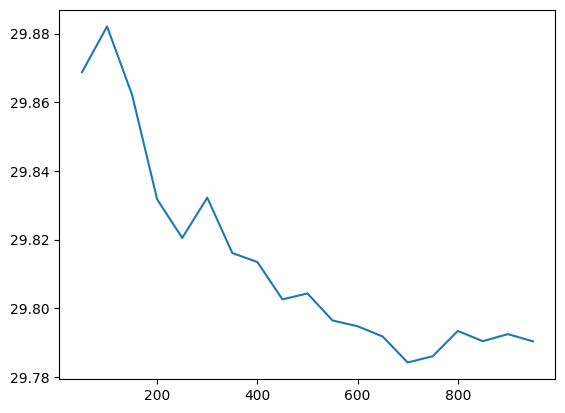

In [33]:
plt.plot(list(result.keys()), list(result.values()))
plt.show()

The number 700 is best for the model

<h2 style="font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>Create model and predict</b></h2>

In [34]:
model = RandomForestRegressor(700, random_state=0)
model.fit(X,y)
predict_salary = model.predict(X)
predict_salary
df_job['Predict_salary'] = predict_salary

<AxesSubplot: xlabel='value', ylabel='job_simp'>

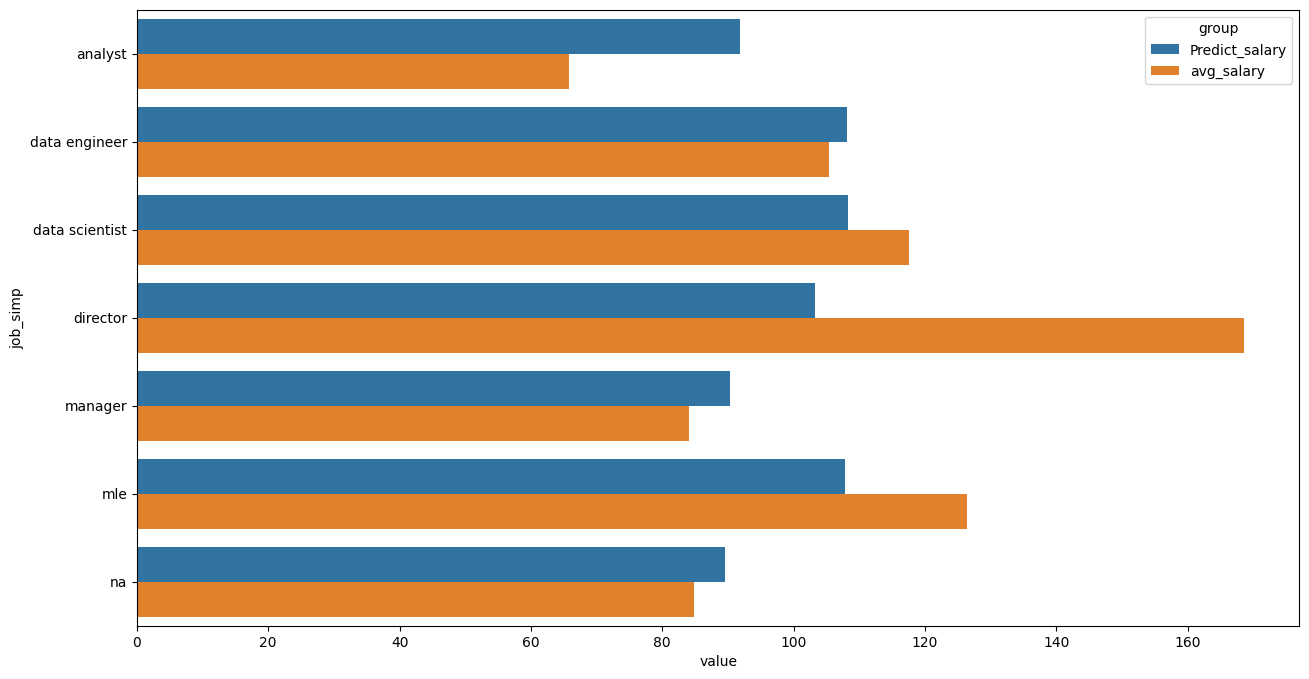

In [35]:
#Predict salary and average salary in data
plt.figure(figsize = (15,8))
job_salary_comp = pd.pivot_table(df_job, index ='job_simp', values = ['avg_salary','Predict_salary'], aggfunc = np.mean).reset_index()
chart = pd.melt(job_salary_comp, id_vars = 'job_simp', value_vars = ['Predict_salary','avg_salary'], var_name = 'group')
sns.barplot(chart, x = 'value', y = 'job_simp', hue = 'group')